# seg face

In [1]:
import sys,os

import torch
import numpy as np

sys.path.append('..')

from modeling import SRNsModel
import util
from sklearn import mixture

_RENDERER = 'FC'
_ORTHO = False

# _MODEL_PATH = '../checkpoints/epoch_0020_iter_090000.pth'
# _TOT_NUM_INSTANCES = 1494
# _OPT_CAM = False

# _MODEL_PATH = '../checkpoints/050701face_seg_2000_depth.pth'
# _OPT_CAM = False
# _TOT_NUM_INSTANCES = 3714

# _MODEL_PATH = '/root/liury/log/SRNs/060706face_celebA/checkpoints/epoch_1359_iter_170000.pth'
# _OPT_CAM = True
# _TOT_NUM_INSTANCES = 1000


# _MODEL_PATH = '/root/liury/log/SRNs/061905seg_teaser/checkpoints/epoch_2400_iter_012000.pth'
# _OPT_CAM = True
# _TOT_NUM_INSTANCES = 37


# _MODEL_PATH = '../checkpoints/061721face_seg_800.pth'
# _OPT_CAM = False
# _TOT_NUM_INSTANCES = 791

# _MODEL_PATH = '/home/anpei/liury/log/SRNs/062923face_seg_800/checkpoints/epoch_0036_iter_110000.pth'
# _OPT_CAM = False
# _TOT_NUM_INSTANCES = 711

# _MODEL_PATH = '/home/anpei/liury/log/SRNs/070212face_seg_800/checkpoints/epoch_0010_iter_030000.pth'
# _OPT_CAM = False
# _TOT_NUM_INSTANCES = 664


# _MODEL_PATH = '/home/anpei/liury/log/SRNs/070821face_seg_800_imae/checkpoints/epoch_0007_iter_020000.pth'
# _OPT_CAM = False
# _TOT_NUM_INSTANCES = 664
# _RENDERER = 'ImAE'

# _MODEL_PATH = '/home/anpei/liury/log/SRNs/061701face_celebA/checkpoints/epoch_0840_iter_420000.pth'
# _OPT_CAM = True
# _TOT_NUM_INSTANCES = 4000

# _MODEL_PATH = os.path.join(
#     os.getenv("HOME"), 'liury/log/SRNs/061916face_celebA/checkpoints/epoch_2000_iter_014000.pth')
# _LOG_ROOT = os.path.join(
#     os.getenv("HOME"), 'liury/log/SRNs/061916face_celebA/reproj_celebA')
# os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
# _OPT_CAM=True

# _TOT_NUM_INSTANCES = 50
# _TOT_NUM_INSTANCES = 3714

# # _MODEL_PATH = '/home/anpei/liury/log/SRNs/072515face_seg_real/checkpoints/epoch_0045_iter_050000.pth'

# _MODEL_PATH = '/home/anpei/liury/log/SRNs/092303face_seg_real_hidden3/checkpoints/epoch_0100_iter_020000.pth'
_MODEL_PATH = '../log/080320new_lstm/checkpoints//epoch_0184_iter_090000.pth'
_OPT_CAM = False
_ORTHO = True
_TOT_NUM_INSTANCES = 122

_IMG_SIZE = 128
_OUT_SIZE = 128


# CelebA 0809
# _MODEL_PATH = '/mnt/data/new_disk2/liury/log/SRNs/080903face_celebA_10k/checkpoints/epoch_0043_iter_109000.pth'
# _OPT_CAM = True
# _ORTHO = True
# _TOT_NUM_INSTANCES = 10000

# _IMG_SIZE = 128
# _OUT_SIZE = 128



# os.environ['CUDA_VISIBLE_DEVICES']='0'
# torch.cuda.set_device(0)

model = SRNsModel(num_instances=_TOT_NUM_INSTANCES,
                  latent_dim=256,
                  renderer=_RENDERER,
                  tracing_steps=10,
                  freeze_networks=True,
                  out_channels=20,
                  img_sidelength=_IMG_SIZE,
                  output_sidelength=_OUT_SIZE,
                  opt_cam=_OPT_CAM,
                  orthogonal=_ORTHO,
                 )

util.custom_load(model, path=_MODEL_PATH, discriminator=None,
                 overwrite_embeddings=False, overwrite_cam=True)

model.eval()
model.cuda()

# _NUM_COMP = 1
# gmm = mixture.GaussianMixture(
#     n_components=_NUM_COMP, covariance_type='full', random_state=0)

# gmm.fit(model.latent_codes.weight.data.cpu().numpy())


[INIT embedding] variable.
[INIT renderer] FC, with renderer = FC


SRNsModel(
  (latent_codes): Embedding(122, 256)
  (hyper_phi): HyperFC(
    (layers): ModuleList(
      (0): NewCls(
        (hyper_linear): HyperLinear(
          (hypo_params): FCBlock(
            (net): Sequential(
              (0): FCLayer(
                (net): Sequential(
                  (0): Linear(in_features=256, out_features=256, bias=True)
                  (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
                  (2): ReLU(inplace=True)
                )
              )
              (1): FCLayer(
                (net): Sequential(
                  (0): Linear(in_features=256, out_features=256, bias=True)
                  (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
                  (2): ReLU(inplace=True)
                )
              )
              (2): Linear(in_features=256, out_features=1024, bias=True)
            )
          )
        )
        (norm_nl): Sequential(
          (0): LayerNorm((256,), eps=1e-05, elementwise_

In [2]:
import numpy as np
from dataset.face_dataset import _campos2matrix
import cv2
from skimage import morphology
from matplotlib import pyplot as plt

_CMAP = np.asarray([[0, 0, 0], [127, 212, 255], [255, 255, 127], [255, 255, 127], # 'background','skin', 'l_brow', 'r_brow'
                    [255, 255, 170], [255, 255, 170], [240, 157, 240], [255, 212, 255], #'l_eye', 'r_eye', 'r_nose', 'l_nose',
                    [31, 162, 230], [127, 255, 255], [127, 255, 255], #'mouth', 'u_lip', 'l_lip'
                    [0, 255, 85], [0, 255, 85], [0, 255, 170], [255, 255, 170], #'l_ear', 'r_ear', 'ear_r', 'eye_g'
                    [127, 170, 255], [85, 0, 255], [255, 170, 127], #'neck', 'neck_l', 'cloth'
                    [212, 127, 255], [0, 170, 255]#, 'hair', 'hat'
                    ])

_CMAP =torch.tensor(_CMAP, dtype=torch.float32) / 255.0

def _build_cam_int(focal, H, W):
    return np.array([  [focal, 0., W // 2, 0.],
                       [0., focal, H // 2, 0],
                       [0., 0, 1, 0],
                       [0, 0, 0, 1]])


def render_scene(model, pose, z, focal, img_sidelength):
    
    with torch.no_grad():
        pose = torch.from_numpy(pose).float().unsqueeze(0)
        cam_int = torch.from_numpy(
            _build_cam_int(focal, _IMG_SIZE, _IMG_SIZE)).float().unsqueeze(0)

        uv = np.mgrid[0:_IMG_SIZE, 0:_IMG_SIZE].astype(np.int32)
        uv = torch.from_numpy(np.flip(uv, axis=0).copy()).long()
        uv = uv.reshape(2, -1).transpose(1, 0).unsqueeze(0)

#         print(pose.shape, cam_int.shape, uv.shape, z.shape)

        predictions, depth_maps = model(pose, z, cam_int, uv)

        pred = torch.argmax(predictions, dim=2, keepdim=True)

#         print(pred.shape)

        out_img = util.lin2img(pred, color_map=_CMAP).cpu().numpy()
        out_seg = pred.view(img_sidelength, img_sidelength, 1).cpu().numpy()
        
        out_img = (out_img.squeeze().transpose(1, 2, 0)) * 255.0
        out_img = out_img.round().clip(0, 255).astype(np.uint8)

        out_seg = out_seg.squeeze().astype(np.uint8)
        out_seg = morphology.area_closing(out_seg, area_threshold=6000)


        return out_img, out_seg
    
    
def render_scene_cam(model, pose, z, cam_int, img_sidelength,orthogonal=True):
    
    with torch.no_grad():
        pose = torch.from_numpy(pose).float().unsqueeze(0)
        cam_int = torch.from_numpy(cam_int).float().unsqueeze(0)
        
#         print('*** cam_int = ', cam_int)

        uv = np.mgrid[0:_IMG_SIZE, 0:_IMG_SIZE].astype(np.int32)
        uv = torch.from_numpy(np.flip(uv, axis=0).copy()).long()
        uv = uv.reshape(2, -1).transpose(1, 0).unsqueeze(0)

#         print(pose.shape, cam_int.shape, uv.shape, z.shape)

        predictions, depth_maps = model(pose, z, cam_int, uv, orthogonal=orthogonal)

        pred = torch.argmax(predictions, dim=2, keepdim=True)

#         print(pred.shape)

        out_img = util.lin2img(pred, color_map=_CMAP).cpu().numpy()
        out_seg = pred.view(img_sidelength, img_sidelength, 1).cpu().numpy()
        
        out_img = (out_img.squeeze().transpose(1, 2, 0)) * 255.0
        out_img = out_img.round().clip(0, 255).astype(np.uint8)

#         output_fp = os.path.join(instance_dir, '%02d_seg.png'%(observation_idx))
        out_seg = out_seg.squeeze().astype(np.uint8)

#         plt.subplot(1, 2, 1)
#         plt.imshow(out_img)
#         plt.subplot(1, 2, 2)
#         plt.imshow(out_seg)

#         plt.show()

        return out_img, out_seg
    

In [ ]:
# render with spiral path

import random,os,imageio
from scipy.stats import norm

def _campos2matrix(cam_pos, cam_center=None, cam_up=None):
    _cam_target = np.asarray([0,0.11,0.1]) if cam_center is None else cam_center
    _cam_target = _cam_target.reshape((1, 3))
    # print('*** cam_center = ', _cam_target.shape)

    _cam_up = np.asarray([0.0, 1.0, 0.0]) if cam_up is None else cam_up

    cam_dir = (_cam_target-cam_pos)
    cam_dir = cam_dir / np.linalg.norm(cam_dir)
    cam_right = np.cross(cam_dir, _cam_up)
    cam_right = cam_right / np.linalg.norm(cam_right)
    cam_up = np.cross(cam_right, cam_dir)

    cam_R = np.concatenate([cam_right.T, -cam_up.T, cam_dir.T], axis=1)

    cam_P = np.eye(4)
    cam_P[:3, :3] = cam_R
    cam_P[:3, 3] = cam_pos

    return cam_P

def render_spiral_path(cam_center,lookat,radii,src_latent,trgt_latent):
    # ROTATE
    R = np.linalg.norm(cam_center-lookat) + radii[0]

    theta = []
    theta_range = [0.0, -0.55, 0.55, 0.0]
    for i in range(len(theta_range)-1):
        theta.append( np.linspace(theta_range[i],theta_range[i+1], num=_INTERP_STEPS))
#         theta.append(np.logspace(0.0, 1, 10, endpoint=False)[::-1]/100)
    theta = np.concatenate(theta)
    x = R*np.sin(theta)
    y = np.zeros_like(x)
    z = R*np.cos(theta)
    cam_T = np.stack([x,y,z],axis=1) + lookat.reshape((1,3))

    vis_outputs,out_segs = [],[]
    for i in range(len(theta)):
        cam_pose = _campos2matrix(cam_T[i], lookat)        
        out_img, out_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=_ORTHO)  

        vis_outputs.append(out_img)
        out_segs.append(out_seg)


    # SPPIRAL PATH
    t = np.linspace(0, 4*np.pi, _INTERP_STEPS*4, endpoint=True)
    for k in range(len(t)):
        cam_T = np.array([np.cos(t[k]), -np.sin(t[k]), -np.sin(0.5*t[k])]) * radii
        cam_T = cam_T[[1,2,0]] + cam_center
        cam_pose = _campos2matrix(cam_T, lookat)
        out_img, out_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=_ORTHO)  
        vis_outputs.append(out_img)
        out_segs.append(out_seg)

    cdf_scale = 1.0/(1.0-norm.cdf(-_INTERP_STEPS//2,0,6)*2)
    for idx in range(-_INTERP_STEPS//2,_INTERP_STEPS//2+1):
        
        _w = (norm.cdf(idx,0,6)-norm.cdf(-_INTERP_STEPS//2,0,6))*cdf_scale
        latent = (1.0-_w)*src_latent + _w*trgt_latent
        
        out_img, out_seg = render_scene_cam(model, cam_pose, latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=_ORTHO) 
        vis_outputs.append(out_img)
        out_segs.append(out_seg)


    for k in range(len(t)):
        cam_T = np.array([np.cos(t[k]), -np.sin(t[k]), -np.sin(0.5*t[k])]) * radii
        cam_T = cam_T[[1,2,0]] + cam_center
        cam_pose = _campos2matrix(cam_T, lookat)
        out_img, out_seg = render_scene_cam(model, cam_pose, trgt_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=_ORTHO)  
        vis_outputs.append(out_img)
        out_segs.append(out_seg)

    for idx in range(-_INTERP_STEPS//2,_INTERP_STEPS//2+1):
        _w = (norm.cdf(idx,0,6)-norm.cdf(-_INTERP_STEPS//2,0,6))*cdf_scale
        latent = (1.0-_w)*trgt_latent + _w*src_latent
        out_img, out_seg = render_scene_cam(model, cam_pose, latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=_ORTHO) 
        vis_outputs.append(out_img)
        out_segs.append(out_seg)

    return out_segs,vis_outputs

def render_uniform_path(cam_center,lookat,radii,src_latent,trgt_latent):
    # ROTATE
    R = np.linalg.norm(cam_center-lookat) + radii[0]

    theta = []
    theta_range = [-0.55, 0.55]
    for i in range(len(theta_range)-1):
        theta.append( np.linspace(theta_range[i],theta_range[i+1], num=_INTERP_STEPS))
        
    ys = np.linspace(0.3,-0.2,5,endpoint=True)
    
    theta = np.concatenate(theta)
    x = R*np.sin(theta)
    z = R*np.cos(theta)
    
    vis_outputs,out_segs = [],[]
    for y in ys:
        
        cam_T = np.stack([x,np.ones_like(x)*y,z],axis=1) + lookat.reshape((1,3))

        for i in range(len(theta)):
            cam_pose = _campos2matrix(cam_T[i], lookat)        
            out_img, out_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=_ORTHO)  
            vis_outputs.append(out_img)
            out_segs.append(out_seg)

    return out_segs,vis_outputs


f = 500
_DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])

lookat = np.asarray([0,0.0,0.1])
print('*** lookat = ', lookat)

cam_center =  lookat + np.asarray([0, 0, 0.9])
cam_up = np.asarray([0.0, 1.0, 0.0])


radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y

# f = 1200
# _DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])

# lookat = np.asarray([0,0.0,0.0])
# print('*** lookat = ', lookat)

# cam_center =  lookat + np.asarray([0., 0.0, 1.2])
# cam_up = np.asarray([0.0, -1.0, 0.0])


# radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y

_LOG_ROOT = os.path.join('../log/mv')
os.makedirs(_LOG_ROOT, exist_ok=True)
os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
print('Logging root = ', _LOG_ROOT)

_INTERP_STEPS = 3
all_instances = list(range(_TOT_NUM_INSTANCES))
random.shuffle(all_instances)


_ORTHO=False


for num_comp in [16]:#, 2, 4, 8, 16
    gmm = mixture.GaussianMixture(
        n_components=num_comp, covariance_type='full')
    gmm.fit(model.latent_codes.weight.data.cpu().numpy())

    print('Processing gmm :', num_comp)
    
    for i in range(1000):

#         src_idx = all_instances[i]
#         trgt_idx = all_instances[(i+173)%_TOT_NUM_INSTANCES]

#         src_latent = model.get_embedding({'instance_idx': torch.LongTensor([src_idx]).squeeze().cuda()}).unsqueeze(0)
#         trgt_latent = model.get_embedding({'instance_idx': torch.LongTensor([trgt_idx]).squeeze().cuda()}).unsqueeze(0)

        
        src_latent = torch.from_numpy(gmm.sample(1)[0]).float()
        trgt_latent = torch.from_numpy(gmm.sample(1)[0]).float()
    
    
        output_dir = os.path.join(
            _LOG_ROOT, 'gmm_%02d'%(num_comp), '%03d'%(i))
        os.makedirs(os.path.join(output_dir), exist_ok=True)

#         out_segs,vis_outputs = render_spiral_path(cam_center,lookat,radii,src_latent,trgt_latent)
        out_segs,vis_outputs = render_uniform_path(cam_center,lookat,radii,src_latent,trgt_latent)
        
        
        for k,out_seg in enumerate(out_segs):
            output_fp = os.path.join(output_dir, '%04d.png'%k)
            util.write_img(out_seg, output_fp)
        
#         for k in np.random.randint(0,len(out_segs),6):
#             output_fp = os.path.join(os.path.join(_LOG_ROOT, 'subSample', '%02d_%04d.png'%(i,k)))
#             util.write_img(out_segs[k], output_fp)        

        vis_fp = os.path.join(_LOG_ROOT, 'vis', '%02d_'%(num_comp)+os.path.basename(output_dir)+'.gif')
        print('\t [DONE] save vis to : ', vis_fp)
        imageio.mimsave(vis_fp, vis_outputs, fps=15.0)

*** lookat =  [0.  0.  0.1]
Logging root =  ../log/mv
Processing gmm : 16
	 [DONE] save vis to :  ../log/mv/vis/16_000.gif
	 [DONE] save vis to :  ../log/mv/vis/16_001.gif
	 [DONE] save vis to :  ../log/mv/vis/16_002.gif
	 [DONE] save vis to :  ../log/mv/vis/16_003.gif
	 [DONE] save vis to :  ../log/mv/vis/16_004.gif
	 [DONE] save vis to :  ../log/mv/vis/16_005.gif
	 [DONE] save vis to :  ../log/mv/vis/16_006.gif
	 [DONE] save vis to :  ../log/mv/vis/16_007.gif
	 [DONE] save vis to :  ../log/mv/vis/16_008.gif
	 [DONE] save vis to :  ../log/mv/vis/16_009.gif
	 [DONE] save vis to :  ../log/mv/vis/16_010.gif
	 [DONE] save vis to :  ../log/mv/vis/16_011.gif
	 [DONE] save vis to :  ../log/mv/vis/16_012.gif
	 [DONE] save vis to :  ../log/mv/vis/16_013.gif
	 [DONE] save vis to :  ../log/mv/vis/16_014.gif
	 [DONE] save vis to :  ../log/mv/vis/16_015.gif
	 [DONE] save vis to :  ../log/mv/vis/16_016.gif
	 [DONE] save vis to :  ../log/mv/vis/16_017.gif
	 [DONE] save vis to :  ../log/mv/vis/16_018

In [6]:
import os
import numpy as np

In [9]:
from shutil import copyfile
List = sorted(os.listdir('../log/mv/gmm_16'))
os.makedirs(f'/mnt/data/new_disk/chenap/dataset/segmaps/subSample/', exist_ok=True)
for folder in List:
    ind = np.random.randint(0,15,6)
    for i, item in enumerate(ind):
        copyfile(f'../log/mv/gmm_16/{folder}/{item:04d}.png', f'/mnt/data/new_disk/chenap/dataset/segmaps//subSample/{folder}_{i:03d}.png')

In [80]:
# shape eplotion
f = 500
_DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])

lookat = np.asarray([0,0.0,0.1])
print('*** lookat = ', lookat)

cam_center =  lookat + np.asarray([0, 0, 0.9])
cam_up = np.asarray([0.0, 1.0, 0.0])


radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y


_INTERP_STEPS = 20
all_instances = list(range(_TOT_NUM_INSTANCES))
random.shuffle(all_instances)

gmm = mixture.GaussianMixture(
    n_components=16, covariance_type='full')
gmm.fit(model.latent_codes.weight.data.cpu().numpy())

cam_center =  lookat + np.asarray([-0.2, 0.0, 1.0])
cam_pose = _campos2matrix(cam_center, lookat)

_LOG_ROOT = '../log/one_to_more'
smile_dir = torch.from_numpy(np.load('/home/anpei/Jack12/MicrosoftAzure/happiness_dir.npy')).float()
neutral_dir = torch.from_numpy(np.load('/home/anpei/Jack12/MicrosoftAzure/neutral_dir.npy')).float()



for i in range(50):
    src_latent = torch.from_numpy(gmm.sample(1)[0]).float()

    frames = []

    init_img, init_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
    mouse_count = np.sum(init_seg==8)
    direction = smile_dir if np.sum(mouse_count)<20 else neutral_dir
#     src_latent -= direction*(mouse_count/40)
    frames.append(init_seg)

    # expression
    _INTERP_STEPS = 6
    dst_latent = src_latent.clone()
    steps = [0.3/_INTERP_STEPS]*_INTERP_STEPS 
    for j in steps:
        dst_latent += direction*j
        out_img, out_seg = render_scene_cam(model, cam_pose, dst_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
        mask = (out_seg>=2)*(out_seg<=10)

        result = np.array(init_seg)
        result[(result>=2)*(result<=10)] = 1
        result[mask] = out_seg[mask]
        frames.append(result)


#     # hair
#     mask_init = (init_seg>=2)*(init_seg<15)*(init_seg!=11)*(init_seg!=12)
#     for direction in [smile_dir,-smile_dir,neutral_dir,-neutral_dir,0.5*smile_dir,-0.5*smile_dir,0.5*neutral_dir,-0.5*neutral_dir]:
#         dst_latent = src_latent + direction
#         out_img, out_seg = render_scene_cam(model, cam_pose, dst_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
#         mask = (out_seg>=2)*(out_seg<=10)
#         out_seg[mask] = 1
#         out_seg[mask_init] = init_seg[mask_init]
#         frames.append(out_seg)

    # shape
    for j in range(4):
        direction = torch.from_numpy(gmm.sample(1)[0]).float() - src_latent
        dst_latent = src_latent.clone()
        steps = [1.0/_INTERP_STEPS]*_INTERP_STEPS
        for k in steps:
            dst_latent += k*direction
            out_img, out_seg = render_scene_cam(model, cam_pose, dst_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
            frames.append(out_seg)

    output_dir = os.path.join( _LOG_ROOT, '%03d'%i)
    os.makedirs(os.path.join(output_dir), exist_ok=True)
    os.makedirs(os.path.join(_LOG_ROOT,'vis'), exist_ok=True)
        
    for k,out_seg in enumerate(frames):
        output_fp = os.path.join(output_dir, '%04d.png'%k)
        util.write_img(out_seg, output_fp)
        frames[k] = vis_condition_img(id_remap(out_seg))
            
    vis_fp = os.path.join(_LOG_ROOT, 'vis', '%03d.gif'%i)
    print('\t [DONE] save vis to : ', vis_fp)
    imageio.mimsave(vis_fp, frames, fps=5.0)

*** lookat =  [0.  0.  0.1]
	 [DONE] save vis to :  ../log/one_to_more/vis/000.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/001.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/002.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/003.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/004.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/005.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/006.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/007.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/008.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/009.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/010.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/011.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/012.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/013.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/014.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/015.gif
	 [DONE] save vis to :  ../log/one_to_more/vis/016.gif
	 [DONE] save vis to :  ../log/one_to

In [58]:
# smail animate
import random,os,imageio
from scipy.stats import norm

remap_list = np.array([0,1,2,2,3,3,4,5,6,7,8,9,9,10,11,12,13,14,15,16]).astype('float')
def id_remap(seg):
    return remap_list[seg.astype('int')]

def vis_condition_img(img):
    part_colors = [[0, 0, 0], [127, 212, 255], [255, 255, 127], [255, 255, 170],#'skin',1 'eye_brow'2,  'eye'3
                    [240, 157, 240], [255, 212, 255], #'r_nose'4, 'l_nose'5
                    [31, 162, 230], [127, 255, 255], [127, 255, 255],#'mouth'6, 'u_lip'7,'l_lip'8
                    [0, 255, 85], [0, 255, 170], #'ear'9 'ear_r'10
                    [255, 255, 170],
                    [127, 170, 255], [85, 0, 255], [255, 170, 127], #'neck'11, 'neck_l'12, 'cloth'13
                    [212, 127, 255], [0, 170, 255],#, 'hair'14, 'hat'15
                    [255, 255, 0], [255, 255, 85], [255, 255, 170],
                    [255, 0, 255], [255, 85, 255], [255, 170, 255],
                    [0, 255, 255], [85, 255, 255], [170, 255, 255], [100, 150, 200]]
    H,W = img.shape
    condition_img_color = np.zeros((H,W,3)).astype('uint8')

    num_of_class = int(np.max(img))
    for pi in range(1, num_of_class + 1):
        index = np.where(img == pi)
        condition_img_color[index[0], index[1],:] = part_colors[pi]
    return condition_img_color

f = 500
_DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])

lookat = np.asarray([0,0.0,0.1])
print('*** lookat = ', lookat)

cam_center =  lookat + np.asarray([0, 0, 0.9])
cam_up = np.asarray([0.0, 1.0, 0.0])


radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y

_LOG_ROOT = os.path.join('../log/test')
os.makedirs(_LOG_ROOT, exist_ok=True)
os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
print('Logging root = ', _LOG_ROOT)

_INTERP_STEPS = 20
all_instances = list(range(_TOT_NUM_INSTANCES))
random.shuffle(all_instances)

gmm = mixture.GaussianMixture(
    n_components=16, covariance_type='full')
gmm.fit(model.latent_codes.weight.data.cpu().numpy())

cam_pose = _campos2matrix(cam_center, lookat)

_LOG_ROOT = '../log/smile'
smile_dir = torch.from_numpy(np.load('/home/anpei/Jack12/MicrosoftAzure/happiness_dir.npy')).float()
neutral_dir = torch.from_numpy(np.load('/home/anpei/Jack12/MicrosoftAzure/neutral_dir.npy')).float()


_INTERP_STEPS = 10
for i in range(50):
    src_latent = torch.from_numpy(gmm.sample(1)[0]).float()

    frames = []

#     src_latent -= smile_dir
    init_img, init_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
    mouse_count = np.sum(init_seg==8)
    init_seg[(init_seg>=2)*(init_seg<=10)] = 1
    

    direction = smile_dir if np.sum(mouse_count)<20 else neutral_dir
    src_latent -= direction*(mouse_count/200)
        
    steps = [0.8/_INTERP_STEPS]*_INTERP_STEPS + [-1.0/_INTERP_STEPS]*_INTERP_STEPS
    for j in steps:
        src_latent += j*direction
        out_img, out_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
        mask = (out_seg>=2)*(out_seg<=10)

        result = np.array(init_seg)
        result[mask] = out_seg[mask]
        frames.append(result)

    output_dir = os.path.join( _LOG_ROOT, '%03d'%i)
    os.makedirs(os.path.join(output_dir), exist_ok=True)
    os.makedirs(os.path.join(_LOG_ROOT,'vis'), exist_ok=True)
        
    for k,out_seg in enumerate(frames):
        output_fp = os.path.join(output_dir, '%04d.png'%k)
        util.write_img(out_seg, output_fp)
        frames[k] = vis_condition_img(id_remap(out_seg))
            
    vis_fp = os.path.join(_LOG_ROOT, 'vis', '%03d.gif'%i)
    #print('\t [DONE] save vis to : ', vis_fp)
    imageio.mimsave(vis_fp, frames, fps=5.0)


*** lookat =  [0.  0.  0.1]
Logging root =  ../log/test
	 [DONE] save vis to :  ../log/smile/vis/000.gif
	 [DONE] save vis to :  ../log/smile/vis/001.gif
	 [DONE] save vis to :  ../log/smile/vis/002.gif
	 [DONE] save vis to :  ../log/smile/vis/003.gif
	 [DONE] save vis to :  ../log/smile/vis/004.gif
	 [DONE] save vis to :  ../log/smile/vis/005.gif
	 [DONE] save vis to :  ../log/smile/vis/006.gif
	 [DONE] save vis to :  ../log/smile/vis/007.gif
	 [DONE] save vis to :  ../log/smile/vis/008.gif
	 [DONE] save vis to :  ../log/smile/vis/009.gif
	 [DONE] save vis to :  ../log/smile/vis/010.gif
	 [DONE] save vis to :  ../log/smile/vis/011.gif
	 [DONE] save vis to :  ../log/smile/vis/012.gif
	 [DONE] save vis to :  ../log/smile/vis/013.gif
	 [DONE] save vis to :  ../log/smile/vis/014.gif
	 [DONE] save vis to :  ../log/smile/vis/015.gif
	 [DONE] save vis to :  ../log/smile/vis/016.gif
	 [DONE] save vis to :  ../log/smile/vis/017.gif
	 [DONE] save vis to :  ../log/smile/vis/018.gif
	 [DONE] save

In [59]:
# hair

f = 500
_DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])

lookat = np.asarray([0,0.0,0.1])
print('*** lookat = ', lookat)

cam_center =  lookat + np.asarray([0, 0, 0.9])
cam_up = np.asarray([0.0, 1.0, 0.0])


radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y

_LOG_ROOT = os.path.join('../log/test')
os.makedirs(_LOG_ROOT, exist_ok=True)
os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
print('Logging root = ', _LOG_ROOT)

_INTERP_STEPS = 20
all_instances = list(range(_TOT_NUM_INSTANCES))
random.shuffle(all_instances)

gmm = mixture.GaussianMixture(
    n_components=16, covariance_type='full')
gmm.fit(model.latent_codes.weight.data.cpu().numpy())

cam_pose = _campos2matrix(cam_center, lookat)

_LOG_ROOT = '../log/hair'
smile_dir = torch.from_numpy(np.load('/home/anpei/Jack12/MicrosoftAzure/happiness_dir.npy')).float()*0.8
neutral_dir = torch.from_numpy(np.load('/home/anpei/Jack12/MicrosoftAzure/neutral_dir.npy')).float()


_INTERP_STEPS = 10
for i in range(50):
    src_latent = torch.from_numpy(gmm.sample(1)[0]).float()

    frames = []

#     src_latent -= smile_dir
    init_img, init_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
    mouse_count = np.sum(init_seg==8)
    mask_init = (init_seg>=2)*(init_seg<=15)*(init_seg!=11)*(init_seg!=12)
    

    direction = smile_dir if np.sum(mouse_count)<20 else neutral_dir
    src_latent -= direction*(mouse_count/200)
        
    steps = [1.0/_INTERP_STEPS]*_INTERP_STEPS + [-1.0/_INTERP_STEPS]*_INTERP_STEPS
    for j in steps:
        src_latent += j*direction
        out_img, out_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
        mask = (out_seg>=2)*(out_seg<=10)

        out_seg[mask] = 1
        out_seg[mask_init] = init_seg[mask_init]
        frames.append(out_seg)

    output_dir = os.path.join( _LOG_ROOT, '%03d'%i)
    os.makedirs(os.path.join(output_dir), exist_ok=True)
    os.makedirs(os.path.join(_LOG_ROOT,'vis'), exist_ok=True)
        
    for k,out_seg in enumerate(frames):
        output_fp = os.path.join(output_dir, '%04d.png'%k)
        util.write_img(out_seg, output_fp)
        frames[k] = vis_condition_img(id_remap(out_seg))
            
    vis_fp = os.path.join(_LOG_ROOT, 'vis', '%03d.gif'%i)
    #print('\t [DONE] save vis to : ', vis_fp)
    imageio.mimsave(vis_fp, frames, fps=5.0)

*** lookat =  [0.  0.  0.1]
Logging root =  ../log/test
	 [DONE] save vis to :  ../log/hair/vis/000.gif
	 [DONE] save vis to :  ../log/hair/vis/001.gif
	 [DONE] save vis to :  ../log/hair/vis/002.gif
	 [DONE] save vis to :  ../log/hair/vis/003.gif
	 [DONE] save vis to :  ../log/hair/vis/004.gif
	 [DONE] save vis to :  ../log/hair/vis/005.gif
	 [DONE] save vis to :  ../log/hair/vis/006.gif
	 [DONE] save vis to :  ../log/hair/vis/007.gif
	 [DONE] save vis to :  ../log/hair/vis/008.gif
	 [DONE] save vis to :  ../log/hair/vis/009.gif
	 [DONE] save vis to :  ../log/hair/vis/010.gif
	 [DONE] save vis to :  ../log/hair/vis/011.gif
	 [DONE] save vis to :  ../log/hair/vis/012.gif
	 [DONE] save vis to :  ../log/hair/vis/013.gif
	 [DONE] save vis to :  ../log/hair/vis/014.gif
	 [DONE] save vis to :  ../log/hair/vis/015.gif
	 [DONE] save vis to :  ../log/hair/vis/016.gif
	 [DONE] save vis to :  ../log/hair/vis/017.gif
	 [DONE] save vis to :  ../log/hair/vis/018.gif
	 [DONE] save vis to :  ../log/h

In [5]:
# shape

f = 500
_DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])

lookat = np.asarray([0,0.0,0.1])
print('*** lookat = ', lookat)

cam_center =  lookat + np.asarray([0, 0, 0.9])
cam_up = np.asarray([0.0, 1.0, 0.0])


radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y

_LOG_ROOT = os.path.join('../log/test')
os.makedirs(_LOG_ROOT, exist_ok=True)
os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
print('Logging root = ', _LOG_ROOT)

_INTERP_STEPS = 20
all_instances = list(range(_TOT_NUM_INSTANCES))
random.shuffle(all_instances)

gmm = mixture.GaussianMixture(
    n_components=16, covariance_type='full')
gmm.fit(model.latent_codes.weight.data.cpu().numpy())

cam_pose = _campos2matrix(cam_center, lookat)

_LOG_ROOT = '../log/shape'


_INTERP_STEPS = 10
for i in range(50):
    src_latent = torch.from_numpy(gmm.sample(1)[0]).float()
    dst_latent = torch.from_numpy(gmm.sample(1)[0]).float()

    frames = []

    driection = dst_latent - src_latent
    steps = [1.0/_INTERP_STEPS]*_INTERP_STEPS + [-1.0/_INTERP_STEPS]*_INTERP_STEPS
    for j in steps:
        src_latent += j*direction
        out_img, out_seg = render_scene_cam(model, cam_pose, src_latent, _DEFAULT_CAM_INT, _OUT_SIZE, orthogonal=False)
        frames.append(out_seg)

    output_dir = os.path.join( _LOG_ROOT, '%03d'%i)
    os.makedirs(os.path.join(output_dir), exist_ok=True)
    os.makedirs(os.path.join(_LOG_ROOT,'vis'), exist_ok=True)
        
    for k,out_seg in enumerate(frames):
        output_fp = os.path.join(output_dir, '%04d.png'%k)
        util.write_img(out_seg, output_fp)
        frames[k] = vis_condition_img(id_remap(out_seg))
            
    vis_fp = os.path.join(_LOG_ROOT, 'vis', '%03d.gif'%i)
    #print('\t [DONE] save vis to : ', vis_fp)
    imageio.mimsave(vis_fp, frames, fps=5.0)

*** lookat =  [0.  0.  0.1]
Logging root =  ../log/test


NameError: name 'random' is not defined

In [ ]:
# Vis all instances

import random,os

_LOG_ROOT = os.path.join(os.getenv("HOME"), 'liury/log/SRNs/test', 'custo_070821face_seg_800_imae')
os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
print('Logging root = ', _LOG_ROOT)

_INTERP_STEPS = 2
all_instances = list(range(_TOT_NUM_INSTANCES))
for i in range(1):

    lat_idx = [all_instances[i], random.choice(all_instances)]
    src_idx = all_instances[i]
    
    src_latent = model.get_embedding({'instance_idx': torch.LongTensor([src_idx]).squeeze().cuda()}).unsqueeze(0)
    
    cam_K = '../checkpoints/intrinsics.txt'
    cam_int = data_util.parse_intrinsics(cam_K, trgt_sidelength=128)
    focal = cam_int[0, 0]
    cx, cy = cam_int[:2, 2]

    cam_center = np.asarray([0., 0.11, 0.1])
    cam_T = np.asarray([0.0, 0.0, 1.0]) + cam_center
    cam_pose = _campos2matrix(cam_T, cam_center)
    print(cam_pose)


    latent = src_latent 

    out_img, out_seg = render_scene(model, cam_pose, latent, focal, _OUT_SIZE)        

    vis_fp = os.path.join(_LOG_ROOT, 'vis','%04d.png'%src_idx)
#     print('[DONE] save vis to : ', vis_fp)
    util.write_img(out_img[...,::-1], vis_fp)

In [69]:
_DEFAULT_CAM_INT = np.load(
    '/home/anpei/liury/data/facial-data/seg_face_real/intrinsics_avg.npy')

f = 30
_DEFAULT_CAM_INT = np.array([[f,0,_IMG_SIZE//2],[0,f,_IMG_SIZE//2],[0,0,1]])


lookat = np.asarray([0, 0, 0])
print('*** lookat = ', lookat)

cam_center =  np.asarray([0, 0, 2.2])
cam_up = np.asarray([0.0, -1.0, 0.0])

radii, focus_depth = np.asarray([0.1,0.3,0.2]), 4.5 # z,x,y

_LOG_ROOT = os.path.join(os.getenv("HOME"), 'liury/log/SRNs/test', 'spiral_gmm')
os.makedirs(os.path.join(_LOG_ROOT, 'vis'), exist_ok=True)
print('Logging root = ', _LOG_ROOT)

_INTERP_STEPS = 15
all_instances = list(range(_TOT_NUM_INSTANCES))
random.shuffle(all_instances)

# test camera pose
z = torch.from_numpy(gmm.sample(1)[0]).float().cuda()
out_img, out_seg = render_scene_cam(
    model, _campos2matrix(cam_center, lookat, cam_up), z, _DEFAULT_CAM_INT, _OUT_SIZE)


plt.imshow(out_img)
plt.show()

*** lookat =  [0 0 0]
Logging root =  /home/anpei/liury/log/SRNs/test/spiral_gmm


RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _th_addmm

In [ ]:
_DEFAULT_CAM_INT = '../checkpoints/intrinsics.txt'
_LOG_ROOT = os.path.join(os.getenv("HOME"), 'liury/log/SRNs')

cam_int = data_util.parse_intrinsics(_DEFAULT_CAM_INT, trgt_sidelength=128)
focal = cam_int[0, 0]
cam_center = np.array([0,0.11,0.1])


for i in range(150):
    lat_idx = torch.randint(0, _TOT_NUM_INSTANCES, (2,)).squeeze().cuda()
    src_latent = model.get_embedding({'instance_idx': lat_idx[0]}).unsqueeze(0)
    trgt_latent = model.get_embedding({'instance_idx': lat_idx[1]}).unsqueeze(0)
    
    src_idx = lat_idx[0].cpu().numpy()
    trgt_idx = lat_idx[1].cpu().numpy()
        
    output_dir = os.path.join(
        _LOG_ROOT, 'interp_latent', 's%04d_t%04d'%(src_idx, trgt_idx))
    os.makedirs(os.path.join(output_dir, 'seg'), exist_ok=True)
    
    print('[%02d] %04d -> %04d: %s'%(i, src_idx, trgt_idx, output_dir))
    
    R = np.random.rand()*0.5 + 0.7
    theta = np.random.rand()*0.4 + (np.pi/2-0.2)
    phi = np.random.rand()*1.2 + (np.pi/2-0.6)
    
    x = R * np.sin(theta) * np.cos(phi)
    y = R * np.sin(theta) * np.sin(phi)
    z = R * np.cos(theta)
    
    cam_pose = _campos2matrix(np.array([x, z, y])+cam_center, cam_center)
    
    steps = 30
    
    img_outputs = []    
    
    for idx in range(steps):
        _w = float(idx) / (steps - 1)
        latent = (1.0-_w)*src_latent + _w*trgt_latent
        
        out_img, out_seg = render_scene(model, cam_pose, latent, focal, _OUT_SIZE)
        
        img_outputs.append(out_img)
        output_fp = os.path.join(output_dir, '%04d.png'%(idx))
        util.write_img(out_seg, output_fp)
        
    imageio.mimsave(os.path.join(output_dir, 'output.gif'), img_outputs, fps=10.0)

In [ ]:
# load latent
from glob import glob
from torchvision.utils import make_grid
import torch.nn.functional as F
import cv2

from dataset import data_util
from dataset.data_util import load_seg_map

_ORI_DATA_ROOT = '/mnt/new_disk2/liury/data/facial-data/CelebAMask-HQ/segmap_20'
_LOG_ROOT = os.path.join(os.getenv("HOME"), 'liury/log/SRNs')
_LATENT_ROOT = os.path.join(_LOG_ROOT, '060115face_celebA/latent_codes')

all_latents = glob(os.path.join(_LATENT_ROOT, '*.npy'))

print('tot latents: ', len(all_latents))

_DEFAULT_CAM_INT = '../checkpoints/intrinsics.txt'
cam_int = data_util.parse_intrinsics(_DEFAULT_CAM_INT, trgt_sidelength=128)
focal = cam_int[0, 0]
cam_center = np.array([0,0.11,0.0])

for i in range(27, len(all_latents)):
    out_imgs = []    
    
    item_id = int(os.path.basename(all_latents[i]).split('.')[0].split('_')[1])
    latent = np.load(all_latents[i])
    
    # load ori
    ori_seg = torch.from_numpy(load_seg_map(os.path.join(_ORI_DATA_ROOT, '%d.png'%(item_id)), _OUT_SIZE))
    ori_seg_img = util.lin2img(ori_seg.unsqueeze(0), color_map=_CMAP).cpu().numpy()
    ori_seg_img = (ori_seg_img.squeeze().transpose(1, 2, 0)) * 255.0
    ori_seg_img = ori_seg_img.round().clip(0, 255).astype(np.uint8)
    out_imgs.append(torch.from_numpy(ori_seg_img).permute(2, 0, 1).unsqueeze(0))
        
    # predict
    cam_T = latent[:3]
    latent = torch.from_numpy(latent[3:]).unsqueeze(0).cuda()
    R = np.linalg.norm(cam_T)

    cam_pose = _campos2matrix(cam_T+cam_center, cam_center)
    out_img, out_seg = render_scene(model, cam_pose, latent, focal, _OUT_SIZE)
    out_imgs.append(torch.from_numpy(out_img).permute(2, 0, 1).unsqueeze(0))
    
    # calc mIoU
    ori_seg = F.one_hot(ori_seg.squeeze().long(), 20)
    out_seg = F.one_hot(torch.from_numpy(out_seg).flatten().long(), 20)
    
    print(ori_seg.shape, out_seg.shape)
    break
    
    mIoU = torch.mean(torch.div(
        torch.sum(ori_seg&out_seg, dim=0).float()+1e-8,
        torch.sum(ori_seg|out_seg, dim=0).float()+1e-8))
                
    for step in range(6):
    
        theta = np.random.rand()*0.4 + (np.pi/2-0.2)
        phi = np.random.rand()*1.2 + (np.pi/2-0.6)

        x = R * np.sin(theta) * np.cos(phi)
        y = R * np.sin(theta) * np.sin(phi)
        z = R * np.cos(theta)

        cam_pose = _campos2matrix(np.array([x, z, y])+cam_center, cam_center)
        out_img, out_seg = render_scene(model, cam_pose, latent, focal, _OUT_SIZE)
                
        out_imgs.append(torch.from_numpy(out_img).permute(2, 0, 1).unsqueeze(0))
    
        
    out_imgs = make_grid(torch.cat(out_imgs), nrow=8, padding=1).permute((1, 2, 0)).cpu().numpy()
    
    ############## vis ##################    
    fig = plt.figure(figsize=(45, 5))
    plt.imshow(out_imgs)
    plt.axis('off')
    plt.show()
    ####################################
    
    output_dir = os.path.join(_LOG_ROOT, 'change_view_celebA', '%06d'%(item_id))
    os.makedirs(os.path.join(output_dir, 'seg'), exist_ok=True)    
    render_custo_path(0, latent, cam_center=cam_center, output_dir=output_dir)
    
    print('[%06d] %d : R = %f, mIoU = %f, output_dir = %s'%(i, item_id, R, mIoU, output_dir))

In [ ]:
aa = torch.cat()

In [ ]:
for i in range(100):
    lat_idx = torch.randint(0, _TOT_NUM_INSTANCES, (2,)).squeeze().cuda()
    src_latent = model.get_embedding({'instance_idx': lat_idx[0]}).unsqueeze(0)
    trgt_latent = model.get_embedding({'instance_idx': lat_idx[1]}).unsqueeze(0)
    
    src_idx = lat_idx[0].cpu().numpy()
    trgt_idx = lat_idx[1].cpu().numpy()
    
    print('%02d: %04d -> %04d'%(i, src_idx, trgt_idx))
    
    output_dir = os.path.join(
        _LOG_ROOT, 'out_mode_3', 's%04d_t%04d'%(src_idx, trgt_idx))
    os.makedirs(os.path.join(output_dir, 'seg'), exist_ok=True)
    
    print(output_dir)
    
    render_custo_path(0, src_latent, trgt_latent, output_dir=output_dir)

    cam_pose = _campos2matrix(np.array([0., 0., 0.8])+cam_center, cam_center)
    out_img, out_seg = render_scene(model, cam_pose, _get_latent(i), focal, _OUT_SIZE)

In [ ]:
from dataset.face_dataset import FaceRandomPoseDataset
from torch.utils.data import DataLoader
# from torch.utils.tensorboard import SummaryWriter

import cv2
import imageio

_OUTPUT_DIR = os.path.join(_LOG_ROOT, 'output_iter_020000')
_MODE = 'sphere'
_R = 1.5


_NUM_INSTANCES=10
_NUM_OBSERVATIONS=25

output_dir = os.path.join(_OUTPUT_DIR, _MODE+'_128')
sample_instances = list(np.random.choice(range(_TOT_NUM_INSTANCES), _NUM_INSTANCES, replace=False))

# writer = SummaryWriter(output_dir)

dataset = FaceRandomPoseDataset(
    intrinsics=_CAM_INT,
    cam_center=_CAM_CENTER,
    num_instances=sample_instances, 
    num_observations=_NUM_OBSERVATIONS, 
    sample_radius=_R, mode=_MODE)

dataloader = DataLoader(dataset,
                     collate_fn=dataset.collate_fn,
                     batch_size=1,
                     shuffle=False,
                     drop_last=False)

print('Beginning evaluation...')

images = {}

with torch.no_grad():

    for idx, model_input in enumerate(dataloader):
        model_input, ground_truth = model_input
        
        pose = model_input['pose']
        
#         print(pose)
        
        intrinsics = model_input['intrinsics']
        uv = model_input['uv']
        z = model.get_embedding(model_input)
        
        model_outputs = model(pose, z, intrinsics, uv)
        predictions, depth_maps = model_outputs
                
        batch_size, tensor_len, channels = predictions.shape
        img_sidelen = np.sqrt(tensor_len).astype(int)
                
        pred = torch.argmax(predictions, dim=2, keepdim=True)
        output_img = util.lin2img(pred, color_map=).cpu().numpy()
        output_pred = pred.view(batch_size, img_sidelen, img_sidelen, 1).cpu().numpy()

        for i in range(output_img.shape[0]):
            instance_idx = int(model_input['instance_idx'][i].squeeze().detach().cpu().numpy().astype(np.int64))
            observation_idx = model_input['observation_idx'][i]
            
            instance_dir = os.path.join(output_dir, "%03d" % instance_idx)
            os.makedirs(instance_dir, exist_ok=True)
            
            img = output_img[i, :, :, :].squeeze().transpose(1, 2, 0)
            img *= 255
            img = img.round().clip(0, 255).astype(np.uint8)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

            if not instance_idx in images:
                images[instance_idx] = [None] * _NUM_OBSERVATIONS

            images[instance_idx][observation_idx] = img
#             output_fp = os.path.join(instance_dir, '%02d.png'%(observation_idx))
#             util.write_img(img, output_fp)
            
            output_fp = os.path.join(instance_dir, '%02d_seg.png'%(observation_idx))
            seg_img = output_pred[i, :, :].squeeze().astype(np.uint8)
            
            util.write_img(seg_img, output_fp)
            
#             dpt_img = (output_dpt[i, :, :, :].squeeze() * 255.0).astype(np.uint8)
#             dpt_img = cv2.applyColorMap(dpt_img, cv2.COLORMAP_JET)
#             output_fp = os.path.join(instance_dir, '%02d_depth.png'%(observation_idx))
# #             print('Save output for instance %03d - %02d: %s'%(instance_idx, observation_idx, output_fp))
#             util.write_img(dpt_img, output_fp)
            print('Save output for instance %04d - %02d: %s'%(instance_idx, observation_idx, output_fp))
        
            if observation_idx == _NUM_OBSERVATIONS - 1:
                imageio.mimsave(os.path.join(instance_dir, 'output.gif'), images[instance_idx], fps=5.0)
                print('=== [DONE] saving output.gif.')
            
#         print('[DONE] Save output for instance %03d.'%(instance_idx))


# misc

In [ ]:
# move seg_face_8000
import os
from glob import glob
from shutil import copyfile

data_root = '/data/anpei/facial-data/seg_face_8000/images'
img_fps = glob(os.path.join(data_root, '*_seg_*.png'))
img_ids = list(set([os.path.basename(x)[:5] for x in img_fps]))

for img_id in img_ids:
    output_dir = os.path.join(data_root, img_id)
    os.makedirs(output_dir, exist_ok=True)
    copyfile(
        os.path.join(data_root, '..', 'cam2world.npy'), 
        os.path.join(output_dir, 'cam2world.npy'))
    
    img_fps = glob(os.path.join(data_root, '%s_seg_*.png'%(img_id)))
    print(output_dir, len(imgs))
    for img_fp in sorted(img_fps):
        out_name = os.path.basename(img_fp).split('_')
        out_sub_dir = out_name[0]
        out_name = '_'.join([out_name[1], '%02d'%(int(out_name[-2])*5+int(out_name[-1][:2]))]) + '.png'
        out_name = os.path.join(os.path.dirname(img_fp), out_sub_dir, out_name)
#         print('\t> ', img_fp, out_name)
        os.rename(img_fp, out_name)

In [ ]:
import os
import numpy as np

data_dir = '/data/anpei/facial-data/seg_face_2000/10996'

cam_param = np.load(os.path.join(data_dir, 'cameras.npy'), allow_pickle=True).item() 
print(np.asarray(cam_param['zRange']).shape, np.asarray(cam_param['extrinsics']).shape)

In [ ]:
import torchvision.models as torch_models
import torch

resnet_model = torch_models.resnet18(pretrained=False)
# resnet_model.layer4 = torch.nn.Identity()
# resnet_model.fc = torch.nn.Identity()
resnet_model.conv1 = torch.nn.Conv2d(19, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
print(resnet_model)

In [ ]:
a = resnet_model(torch.Tensor(8, 19, 128, 128))
print(a.shape)

In [ ]:
import torch
from torch.nn import functional as F

aa = torch.randint(0, 19, size=(1, 3, 3))
print(aa.shape)

bb = F.one_hot(aa)
print(bb.shape, bb[0])

In [ ]:
aa = torch.empty(256)
print(aa.shape)

In [ ]:
import cv2

instance_dir = '/data/anpei/facial-data/seg_body/94'
seg_imgs = img = cv2.imread(os.path.join(instance_dir, 'semantic_mask', 'image.cam05_000094.png'), cv2.IMREAD_UNCHANGED).astype(np.float32)
print(np.unique(seg_imgs))


fs = cv2.FileStorage("/data/anpei/facial-data/seg_body/Calib_T_samba/cam05_000000/intrinsic.xml", cv2.FILE_STORAGE_READ)
intrinsics = fs.getNode("M").mat()

print(intrinsics)

H, W = seg_imgs.shape
cx, cy = intrinsics[:2, 2]

x_coord, y_coord = np.where(seg_imgs != 0)
bbox = np.asarray([np.min(x_coord), np.min(y_coord), np.max(x_coord), np.max(y_coord)])
print(bbox)

sidelength = max(bbox[2] - bbox[0], bbox[3] - bbox[1])
center = np.asarray([bbox[2] + bbox[0], bbox[3] + bbox[1]]) / 2.0
bbox = np.ceil(np.asarray([
    center[0]-sidelength/2.0, 
    center[1]-sidelength/2.0, 
    center[0]+sidelength/2.0,
    center[1]+sidelength/2.0])).astype(np.int64)

cx, cy = intrinsics[:2, 2] - bbox[:2]

print(bbox, bbox.dtype)
seg_imgs = seg_imgs[bbox[0]:bbox[2], bbox[1]:bbox[3]]
print(seg_imgs.shape)


print(cx, cy, bbox)
intrinsics[:2, 2] = [cx, cy]
print(intrinsics)


print(H, W, cx, cy)

In [ ]:
from dataset.body_dataset import BodyPartDataset
from torch.utils.data import DataLoader
import numpy as np

import util

from matplotlib import pyplot as plt

dataset = BodyPartDataset(
        data_type='seg',
        img_sidelength=128, 
        sample_observations=list(range(5)),
        sample_instances=list(range(2)))

dataloader = DataLoader(dataset,
                     collate_fn=dataset.collate_fn,
                     batch_size=1,
                     shuffle=False,
                     drop_last=False)

print(len(dataloader))

for idx, model_input in enumerate(dataloader):
    model_input, ground_truth = model_input
        
    seg_img = model_input['rgb']
    pose = model_input['pose']
    intrinsics = model_input['intrinsics']
    uv = model_input['uv']    
    
    print('> ', np.unique(seg_img), seg_img.shape)
    print('> pose = ')
    print(pose)
    print('> cam_int = ')
    print(intrinsics)
    print(seg_img.shape, np.unique(seg_img))
    
    output_img = util.lin2img(seg_img, color_map=dataset.color_map).cpu().numpy()
    
    plt.imshow(output_img.squeeze().transpose(1, 2, 0))
    plt.show()

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=False)
print(model)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

H, W = 512, 512


class ConvBlock(nn.Module):
    def __init__(   self, 
                    in_channels, 
                    out_channels, 
                    kernel_size=3, 
                    stride=1, 
                    num_groups=2):
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, stride//2),
            nn.GroupNorm(num_groups, out_channels),
            nn.ReLU())

    def forward(self, x):
        return self.conv(x)
    

class FeatureExtractor(nn.Module):
    def __init__(self, in_channels=3):
        super(FeatureExtractor, self).__init__()
        self.in_channels = in_channels
        
        self.conv1_1 = ConvBlock(in_channels, 8, 3, 1)
        self.conv1_2 = ConvBlock(8, 16, 3, 2)
        self.conv2_1 = ConvBlock(16, 16, 3, 1)
        self.conv2_2 = ConvBlock(16, 32, 3, 2)
        self.conv3_1 = ConvBlock(32, 32, 3, 1)
        self.deconv4_1 = nn.ConvTranspose2d(32, 16, 3, 2)

        self.conv4_2 = ConvBlock(32, 16, 3, 1)
        self.deconv5_1 = nn.ConvTranspose2d(16, 8, 3, 2)

        self.conv5_2 = ConvBlock(16, 8, 3, 1)

    def forward(self, x):
        x0 = self.conv1_1(x)
        print(x0.shape)
        x = self.conv1_2(x0)
        x1 = self.conv2_1(x)
        x = self.conv2_2(x)
        out0 = self.conv3_1(x)
        x = self.deconv4_1(out0)

        x = torch.cat([x1, x], dim=1)
        out1 = self.conv4_2(x)
        x = self.deconv5_1(out1)
        x = torch.cat([x0, x], dim=1)

        out2 = self.conv5_2(x)
        return out0, out1, out2

In [ ]:
fake_in = torch.rand(8, 3, H, W)
print(fake_in.shape)

feat_worker = FeatureExtractor()

output = feat_worker(fake_in)

print(output.shape)

In [ ]:
import os
from image_utils import Random_Transforms

basedir='/mnt/wmy/sport_1_mask'
cam_id=0

poses = np.loadtxt(os.path.join(basedir,'CamPose.inf'))
Ks = read_intrinsics(os.path.join(basedir,'Intrinsic.inf'))

img_fp = os.path.join(basedir, 'img', '%d/img_%04d.jpg' % (_FRAME_ID, cam_id))
img = imageio.imread(img_fp)
mask_fp = os.path.join(basedir, 'img', 'mask', '%d/img_%04d.jpg' % (_FRAME_ID, cam_id))
mask = imageio.imread(mask_fp)

img, K, img_mask, ROI = transform(img, Ks[cam_id], mask)

print(img.shape)

print(K)

In [ ]:
import imageio

img_fp = os.path.join(basedir, 'img', '%d/img_%04d.jpg' % (0, 0))
img = imageio.imread(img_fp)

print(img.shape)

In [ ]:
print(Ks[0, 0, 0])

In [ ]:
jupyter nbextension enable --py widgetsnbextension

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
# sys.path.remove('/usr/bin/python3.6')
sys.path.append('/root/anaconda3/envs/sofgan/bin/python')

In [2]:
sys.executable

'/root/anaconda3/envs/sofgan/bin/python'

In [82]:
model.latent_codes.weight.data.cpu().numpy().shape

(122, 256)

In [1]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

/home/anpei/anaconda3/envs/srns/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
projection = TSNE(random_state=RS).fit_transform(model.latent_codes.weight.data.cpu().numpy())

In [4]:
projection.shape

(10000, 2)

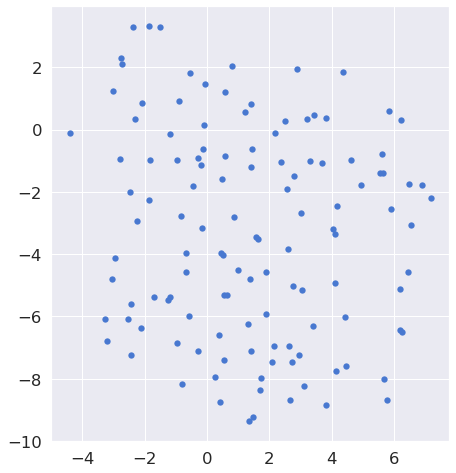

In [10]:
palette = np.array(sns.color_palette("hls", 10))

# We create a scatter plot.
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(projection[:,0], projection[:,1], lw=0, s=40)

In [11]:
a, b = torch.zeros(2), torch.ones(2)
torch.linspace(a,b,steps=6)

TypeError: linspace(): argument 'start' (position 1) must be Number, not Tensor